In [68]:
import pandas as pd
import re
import pymorphy2

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [70]:
df = pd.read_csv('titanicdf.csv')

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df['Name'] = df['Name'].str.replace('/','') 

In [77]:
# функция удаления пунктуации и цифр
def remove_trash(list): 
    pattern = '[^A-Za-z0-9]+'
    try:
      list = [re.sub(pattern, ' ', i) for i in list] 
      print (list)
    except Exception as e:
      print(e)
    return list

In [78]:
df['Name_clean'] = remove_trash(df['Name'])

['Braund Mr Owen Harris', 'Cumings Mrs John Bradley Florence Briggs Thayer ', 'Heikkinen Miss Laina', 'Futrelle Mrs Jacques Heath Lily May Peel ', 'Allen Mr William Henry', 'Moran Mr James', 'McCarthy Mr Timothy J', 'Palsson Master Gosta Leonard', 'Johnson Mrs Oscar W Elisabeth Vilhelmina Berg ', 'Nasser Mrs Nicholas Adele Achem ', 'Sandstrom Miss Marguerite Rut', 'Bonnell Miss Elizabeth', 'Saundercock Mr William Henry', 'Andersson Mr Anders Johan', 'Vestrom Miss Hulda Amanda Adolfina', 'Hewlett Mrs Mary D Kingcome ', 'Rice Master Eugene', 'Williams Mr Charles Eugene', 'Vander Planke Mrs Julius Emelia Maria Vandemoortele ', 'Masselmani Mrs Fatima', 'Fynney Mr Joseph J', 'Beesley Mr Lawrence', 'McGowan Miss Anna Annie ', 'Sloper Mr William Thompson', 'Palsson Miss Torborg Danira', 'Asplund Mrs Carl Oscar Selma Augusta Emilia Johansson ', 'Emir Mr Farred Chehab', 'Fortune Mr Charles Alexander', 'O Dwyer Miss Ellen Nellie ', 'Todoroff Mr Lalio', 'Uruchurtu Don Manuel E', 'Spencer Mrs Will

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund Mr Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings Mrs John Bradley Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen Miss Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle Mrs Jacques Heath Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen Mr William Henry


In [81]:
df.Name.isna().sum()

0

In [82]:
df.shape

(891, 13)

In [83]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [84]:
stop_english = stopwords.words('english')

In [85]:
len(stop_english)

179

In [86]:
text_transformer = TfidfVectorizer(stop_words=stop_english, ngram_range=(1,1), lowercase=True, max_features=15000 ) 

In [88]:
Name = text_transformer.fit_transform(df['Name_clean']) 

In [141]:
X_train, X_test, y_train, y_test = train_test_split(Name, df['Survived'], test_size=0.27, random_state=1877)

In [142]:
print(X_train.shape,X_test.shape)

(650, 1505) (241, 1505)


In [143]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
clf = RandomForestClassifier(n_estimators=100)

In [151]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [152]:
pred = clf.predict(X_test)

In [156]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score

In [157]:
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))

Precision: 0.6521739130434783
Recall: 0.6896551724137931
F1: 0.670391061452514


In [166]:
import matplotlib.pyplot as plt

In [167]:
pred_proba=clf.predict_proba(X_test)[:,1]

In [168]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
tree_auc = roc_auc_score(y_test, pred_proba)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.753


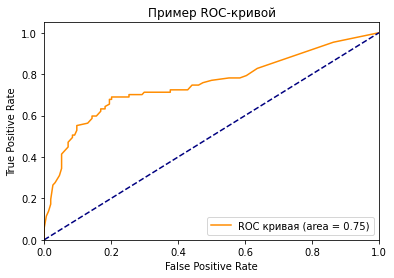

In [169]:
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [180]:
test_deep = []
for deep in range (1,31):
  for leaf in range (1,5):
    clf = tree.DecisionTreeClassifier(max_depth=deep, min_samples_leaf=leaf)
    model = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_deep.append([deep,leaf,f1_score(y_test,pred),recall_score(y_test,pred)])

In [181]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['tree_depth','leaf','f1_score','recall_score']

In [182]:
test_deep

,tree_depth,leaf,f1_score,recall_score
0,1,1,0.652406,0.701149
1,1,2,0.652406,0.701149
2,1,3,0.652406,0.701149
3,1,4,0.652406,0.701149
4,2,1,0.655914,0.701149
...,...,...,...,...
115,29,4,0.621951,0.586207
116,30,1,0.670520,0.666667
117,30,2,0.642857,0.620690
118,30,3,0.636364,0.643678


In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [184]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120],
             'min_samples_leaf':[1,2,3,4,5]}

In [187]:
clf_gs = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=20, scoring = 'recall')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='recall')

In [188]:
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}

In [190]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit

In [193]:
model_new = DecisionTreeClassifier(**clf_gs.best_params_)

In [194]:
model_new.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [195]:
new_pred = model_new.predict(X_test)

In [196]:
cv = ShuffleSplit(n_splits=13, test_size=0.27, random_state=0) 
scores = cross_val_score(model_new, X_train, y_train, cv=cv, scoring='recall')

In [197]:
scores

array([0.8       , 0.83333333, 0.79411765, 0.76315789, 0.859375  ,
       0.85483871, 0.75      , 0.79710145, 0.75949367, 0.84210526,
       0.8       , 0.76470588, 0.77333333])